In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


In [20]:
df = pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\Regression\day1\inclass\mtcars (1).csv')

In [21]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [22]:
df.isnull().sum()# no null values.

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [23]:
df.drop(columns= 'model',inplace =True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.8 KB


In [25]:
df.shape

(32, 11)

In [26]:
df = pd.get_dummies(df ,columns =['cyl','vs','am','gear','carb'],drop_first=True)

In [27]:
df.shape

(32, 17)

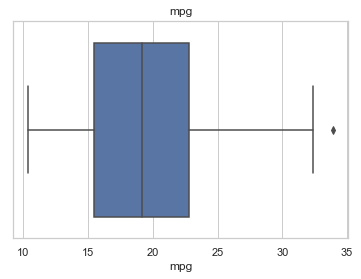

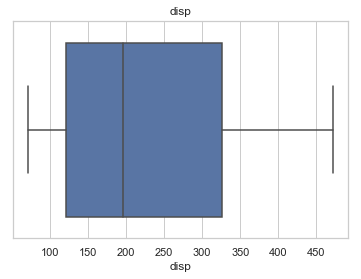

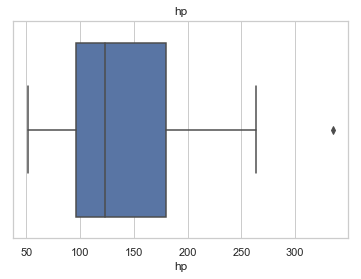

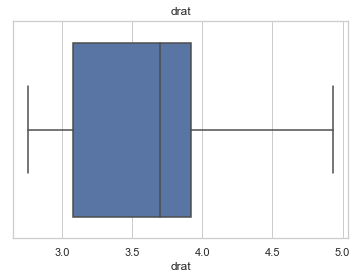

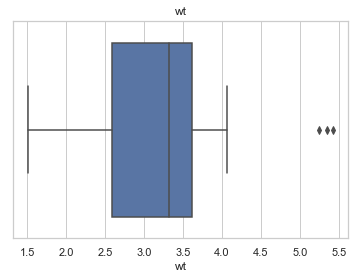

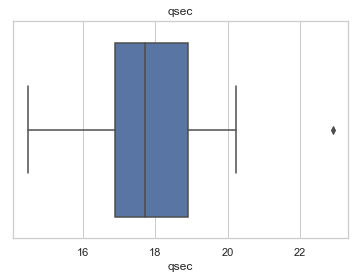

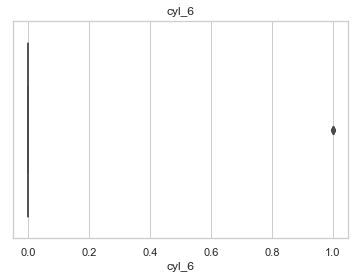

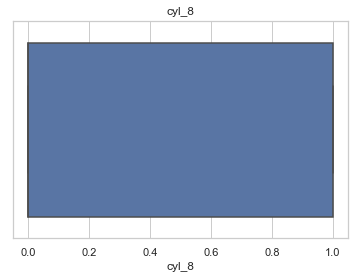

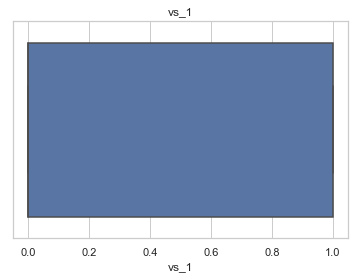

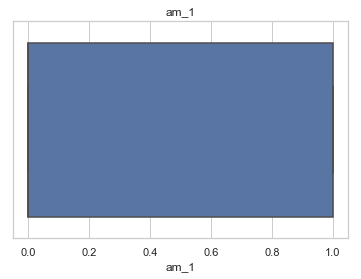

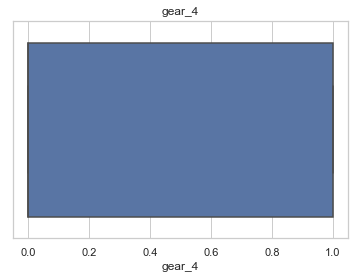

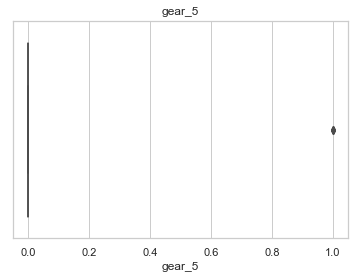

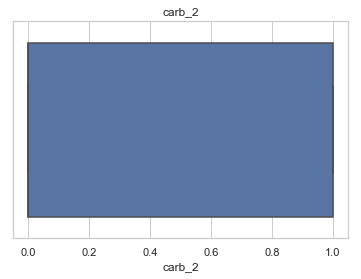

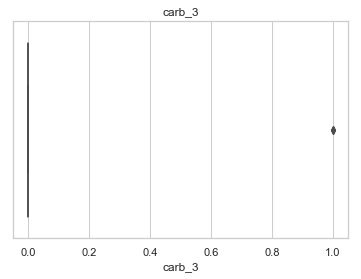

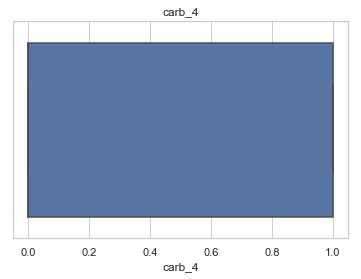

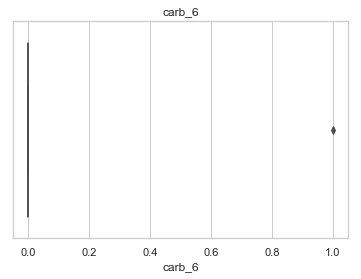

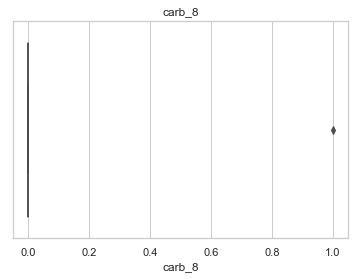

In [28]:
for i in df.columns:
    sns.boxplot(x =i,data =df)
    plt.title(i)
    plt.show()

In [29]:
y = df['mpg']
X = df.drop(columns= 'mpg')

In [30]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(22, 16)
(10, 16)
(10,)


In [31]:
linreg = LinearRegression()
model =linreg.fit(X_train,y_train)

In [32]:
ypredict =model.predict(X_test)


In [33]:
residualserror = ypredict-y_test

In [15]:
R2test = linreg.score(X_test,y_test)
R2train = linreg.score(X_train,y_train)
R2train ,R2test

(0.9577712483239683, 0.4784182423160209)

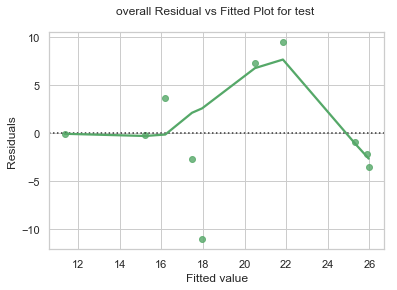

In [35]:
ax = sns.residplot(ypredict, residualserror, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'overall Residual vs Fitted Plot for test \n')
plt.show()

## Assumptions For linear Regression

In [3]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
model1 = sm.OLS(y,X_constant).fit()
model1

NameError: name 'X' is not defined

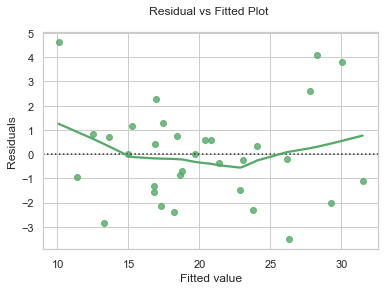

In [17]:
#residual plot
sns.set(style = 'whitegrid')

X_constant['predictions'] = model1.predict(X_constant)
residuals = model1.resid

ax = sns.residplot(X_constant['predictions'], residuals, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

## Assumption 1- No autocorrelation

1) No Auto correlation.

Test needed : Durbin- Watson Test.

It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
If the value ranges from 2-4, it is known as Negative autocorrelation.
If the value is exactly 2, it means No Autocorrelation.
For a good linear model, it should have low or no autocorrelation.
we can see here the values of dublin watson test (test for normality): 2.1( low negative AUTO-CORRELATION)

From the graph below, we can easily see that there is somewhat Positive autocorrelation.

In [2]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid , lags=10 , alpha=0.05)
                            
acf.show()

NameError: name 'model' is not defined

So, there is no auto correlation.

## Assumption 2- Normality of Residuals

(1.7723972125851994, 0.4122197878198619)


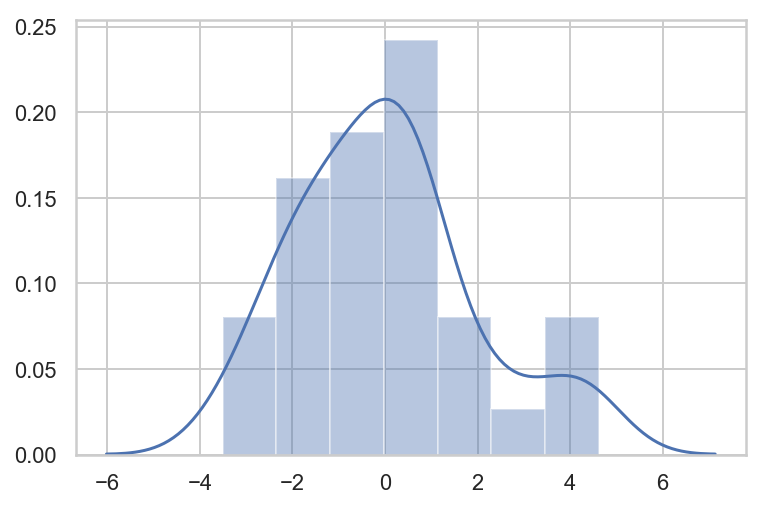

In [147]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))
import seaborn as sns

sns.distplot(lin_reg.resid)

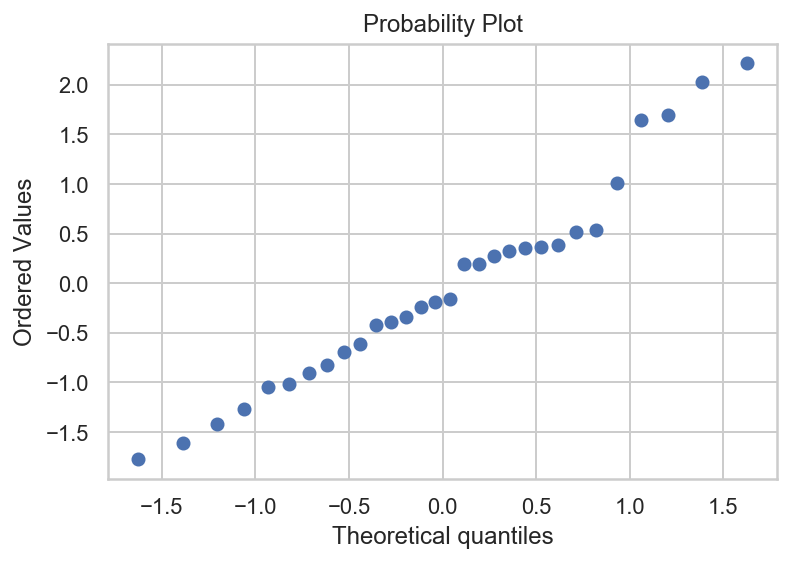

In [148]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

pvalue > 0.05, h0 is accepted, so it is not normal 

In [150]:
## Apply transforation

## Asssumption 3 - Linearity of residuals

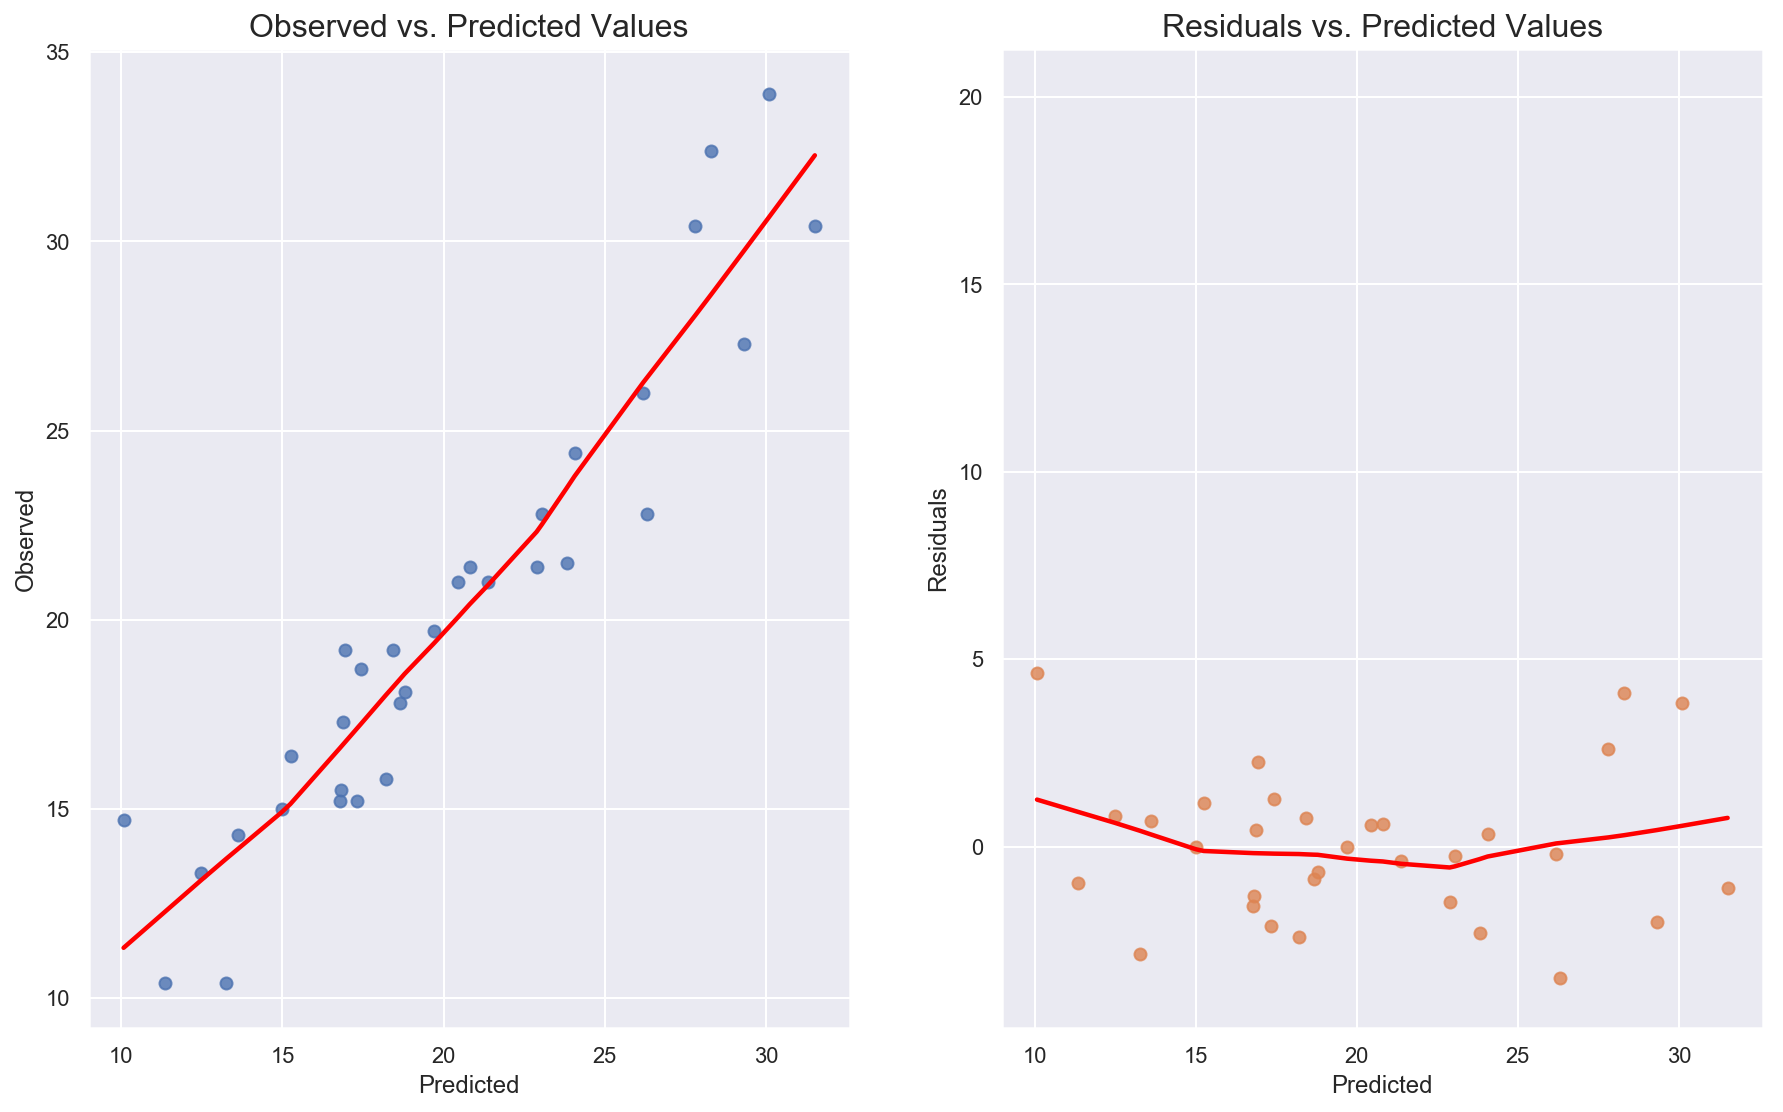

In [151]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

since residuals are in linear relaton , the datapoints are also linear in nature.

In [153]:
## Rainbow test

In [154]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)


(11.528891839979224, 0.03370462398255506)

In [155]:
lin_reg.resid.mean() # this is linear

-2.6145752229922437e-14

## Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)

In [1]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

NameError: name 'model' is not defined

In [164]:
X_constant.shape[1]

18

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

len(vif)

18

In [173]:
pd.DataFrame({'vif': vif[0:]}, index=X_constant.columns).T

,const,disp,hp,drat,wt,qsec,cyl_6,cyl_8,vs_1,am_1,gear_4,gear_5,carb_2,carb_3,carb_4,carb_6,carb_8,predictions
vif,0.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


## Apply transforamtion as normality got failed.

In [178]:
df2 = df.copy()
final_df = df2.transform(lambda x: x**0.5)
final_df.head()
yy =final_df['mpg']
xx = final_df.drop(columns='mpg')


In [179]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant1 = sm.add_constant(xx)
lin_reg1 = sm.OLS(yy,X_constant1).fit()
lin_reg1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     9.049
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           5.10e-05
Time:                        19:15:40   Log-Likelihood:                 6.1952
No. Observations:                  32   AIC:                             21.61
Df Residuals:                      15   BIC:                             46.53
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2667      4.193      1.256      0.228      -3.671      14.204
disp           0.0574      0.106      0.542      0.596      -0.168       0.283
hp            -0.1075      0.092     -1.163      0.263      -0.305       0.090
drat           0.4560      0.990      0.461      0.652      -1.654       2.566
wt            -1.5057      0.971     -1.551      0.142      -3.575       0.564
qsec           0.3213      0.835      0.385      0.706      -1.458       2.100
cyl_6         -0.0781      0.344     -0.227      0.824      -0.812       0.655
cyl_8         -0.0008      0.709     -0.001      0.999      -1.512       1.511
vs_1           0.0313      0.296      0.106      0.917      -0.601       0.663
am_1           0.0198      0.318      0.062      0.951      -0.658       0.698
gear_4         0.2341      0.390      0.601      0.557      -0.596       1.065
gear_5         0.2904      0.383      0.759      0.460      -0.525       1.106
carb_2        -0.1144      0.234     -0.490      0.631      -0.612       0.383
carb_3         0.0681      0.414      0.164      0.872      -0.815       0.951
carb_4        -0.1964      0.409     -0.480      0.638      -1.068       0.676
carb_6         0.0447      0.645      0.069      0.946      -1.329       1.419
carb_8         0.0288      0.725      0.040      0.969      -1.517       1.575
==============================================================================
Omnibus:                        3.324   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.563
Skew:                           0.693   Prob(JB):                        0.278
Kurtosis:                       2.992   Cond. No.                     1.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(2.5628102035887474, 0.27764690408097636)


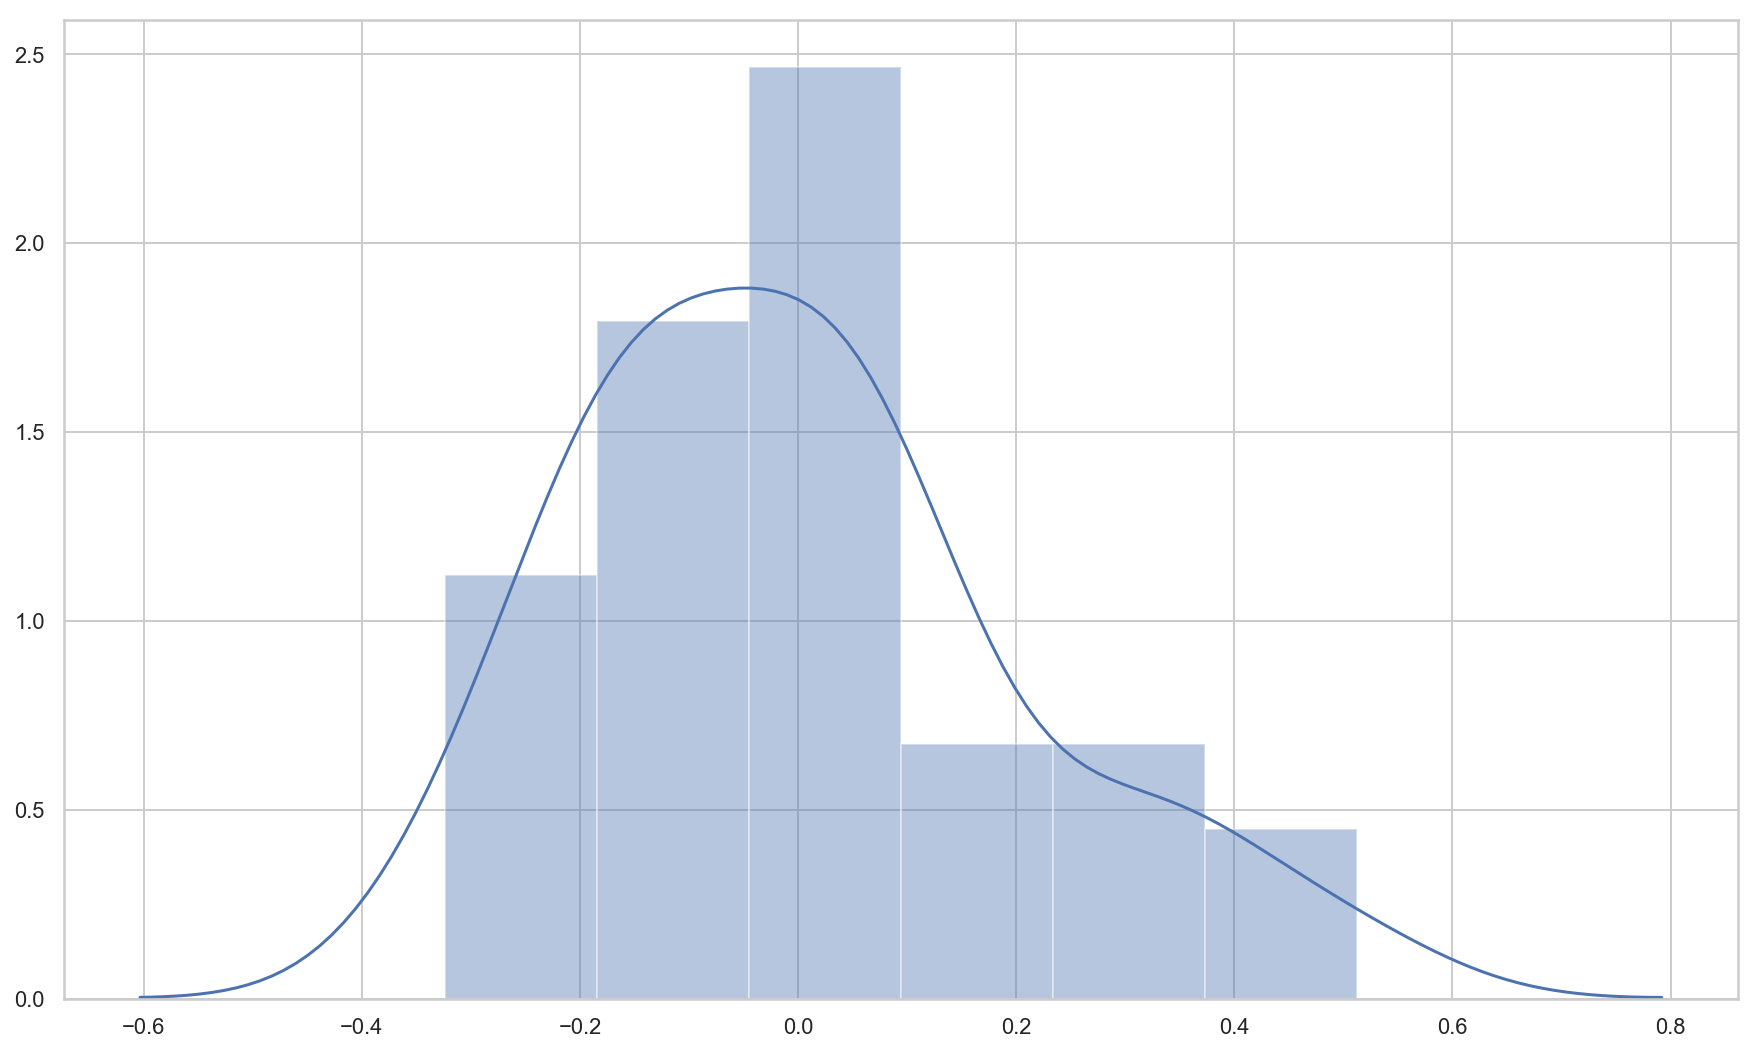

In [180]:
from scipy import stats
print(stats.jarque_bera(lin_reg1.resid))
import seaborn as sns

sns.distplot(lin_reg1.resid)

X_constant = sm.add_constant(xx)# for 
model = sm.OLS(yy, X_constant1).fit()
predictions = model.predict(X_constant)
model.summary()

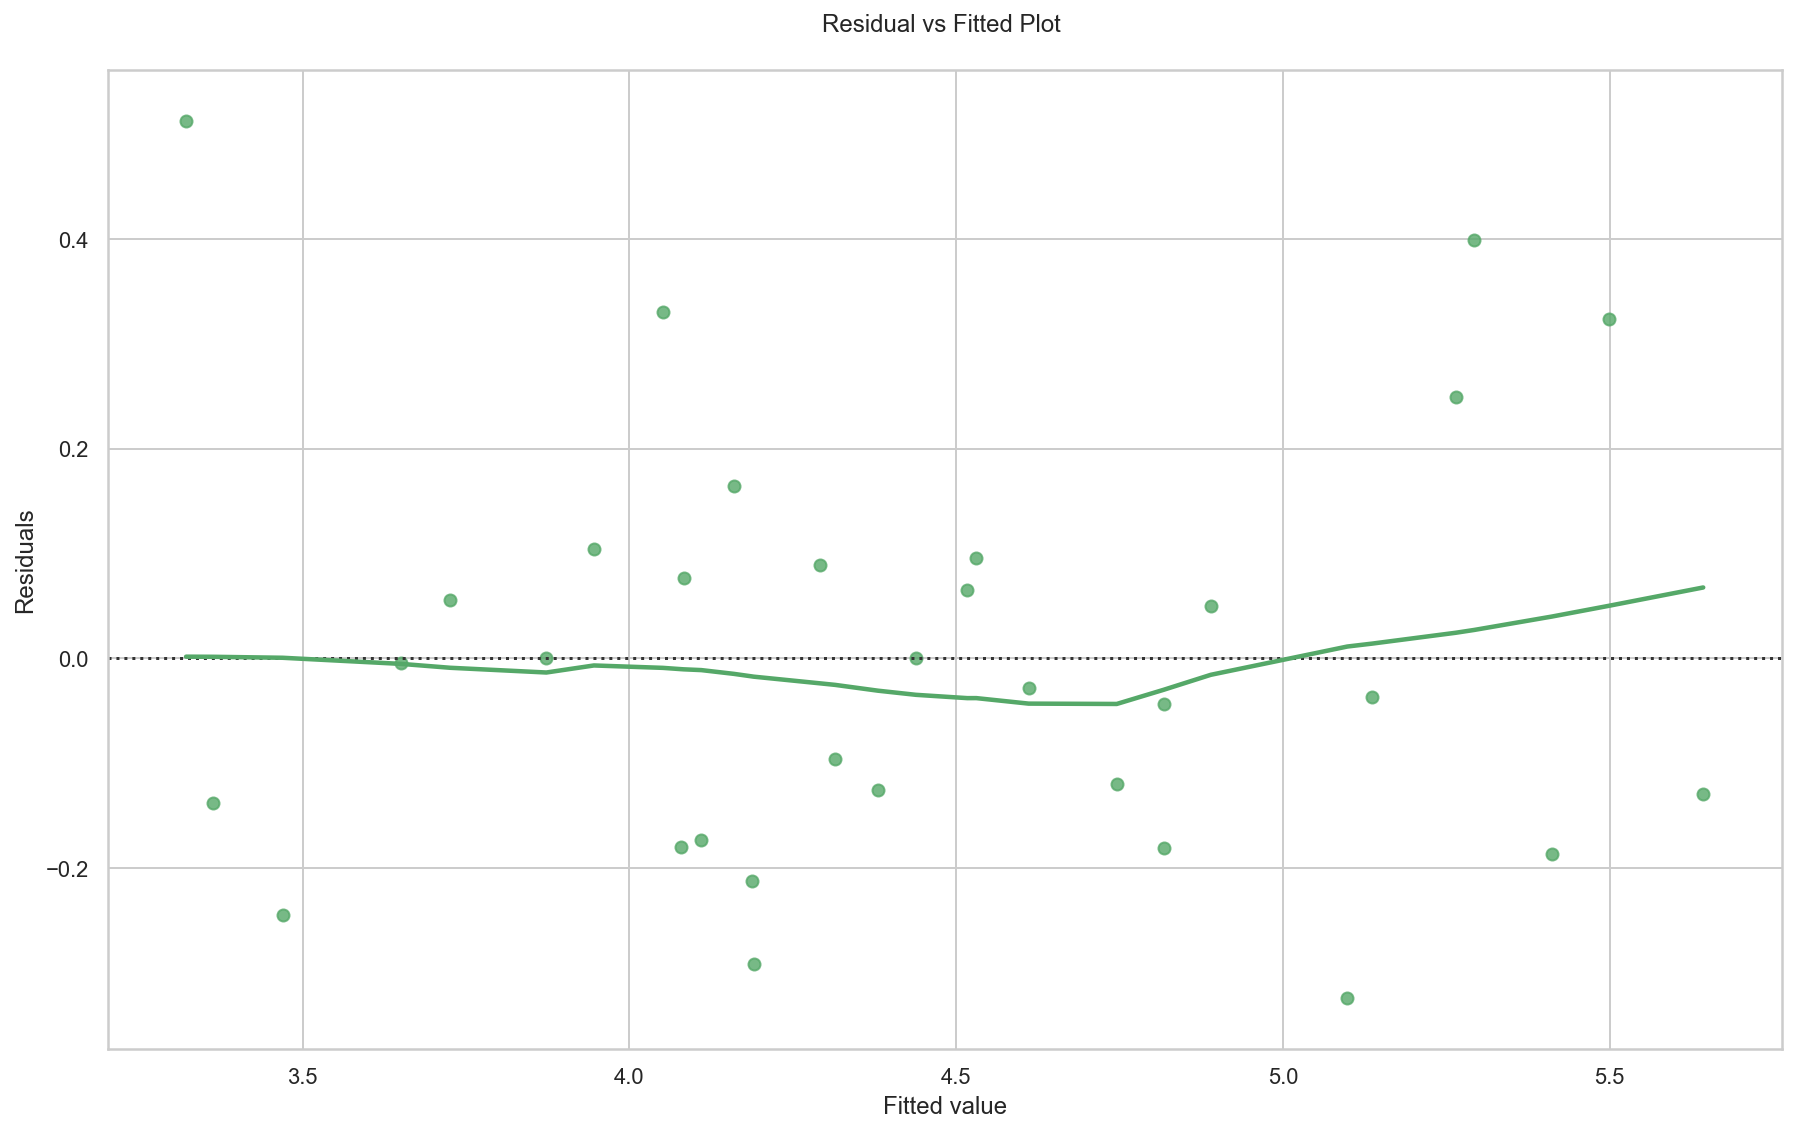

In [181]:
#residual plot
sns.set(style = 'whitegrid')

X_constant1['predictions'] = lin_reg1.predict(X_constant1)
residuals = lin_reg1.resid
residuals
ax = sns.residplot(X_constant1['predictions'], residuals, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

In [ ]:
apply log again. 

0     4.374277
1     4.374277
2     4.574307
3     4.419495
4     4.104840
5     4.031666
6     3.534375
7     4.745162
8     4.574307
9     4.164861
10    3.994589
11    3.816950
12    3.932041
13    3.658056
14    2.942017
15    2.942017
16    3.589850
17    5.521678
18    5.338027
19    5.655541
20    4.430729
21    3.698398
22    3.658056
23    3.391887
24    4.164861
25    5.040313
26    4.910167
27    5.338027
28    3.738319
29    4.224049
30    3.630922
31    4.419495
Name: mpg, dtype: float64     const       disp         hp      drat        wt      qsec  cyl_6  cyl_8  \
0     1.0  12.570545  10.393601  1.571813  1.171503  3.824728    0.5    0.0   
1     1.0  12.570545  10.393601  1.571813  1.258013  3.896589    0.5    0.0   
2     1.0  10.296963   9.541059  1.557576  1.064373  4.093945    0.0    0.0   
3     1.0  16.000361  10.393601  1.324848  1.367647  4.193373    0.5    0.0   
4     1.0  18.921107  13.153593  1.347156  1.436993  3.896589    0.0    0.5   
5     1.0  14.933628

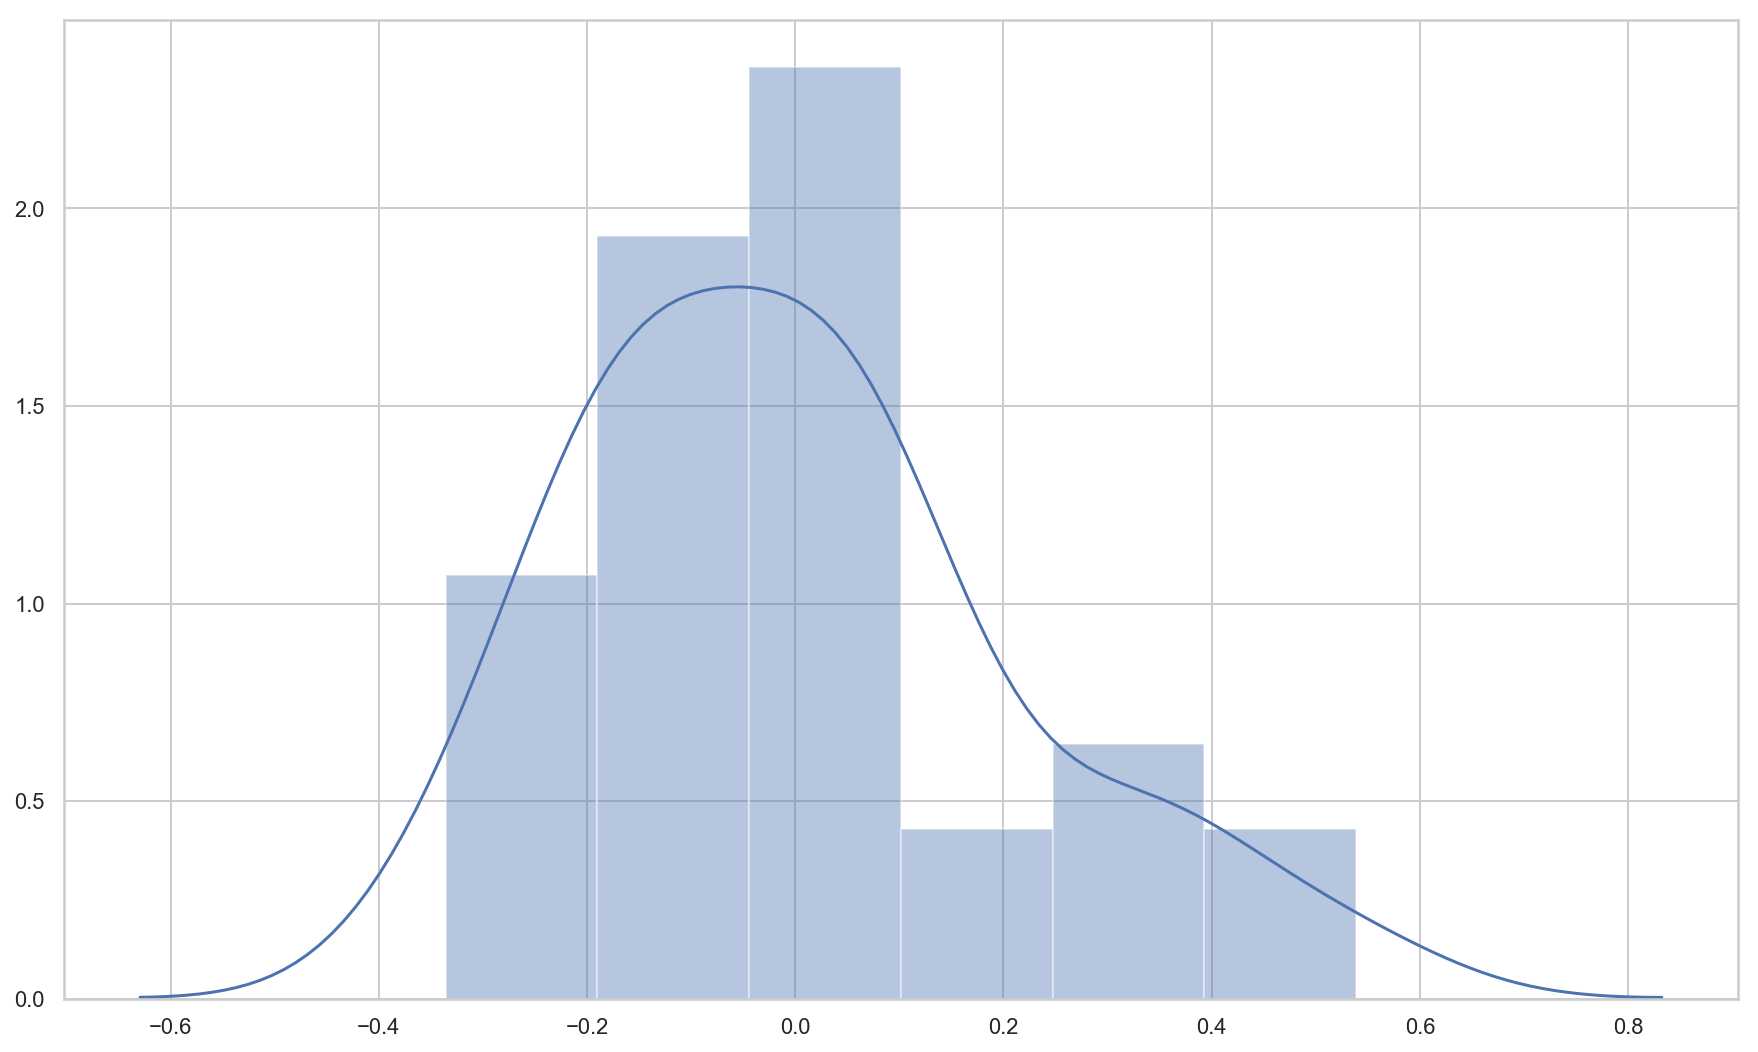

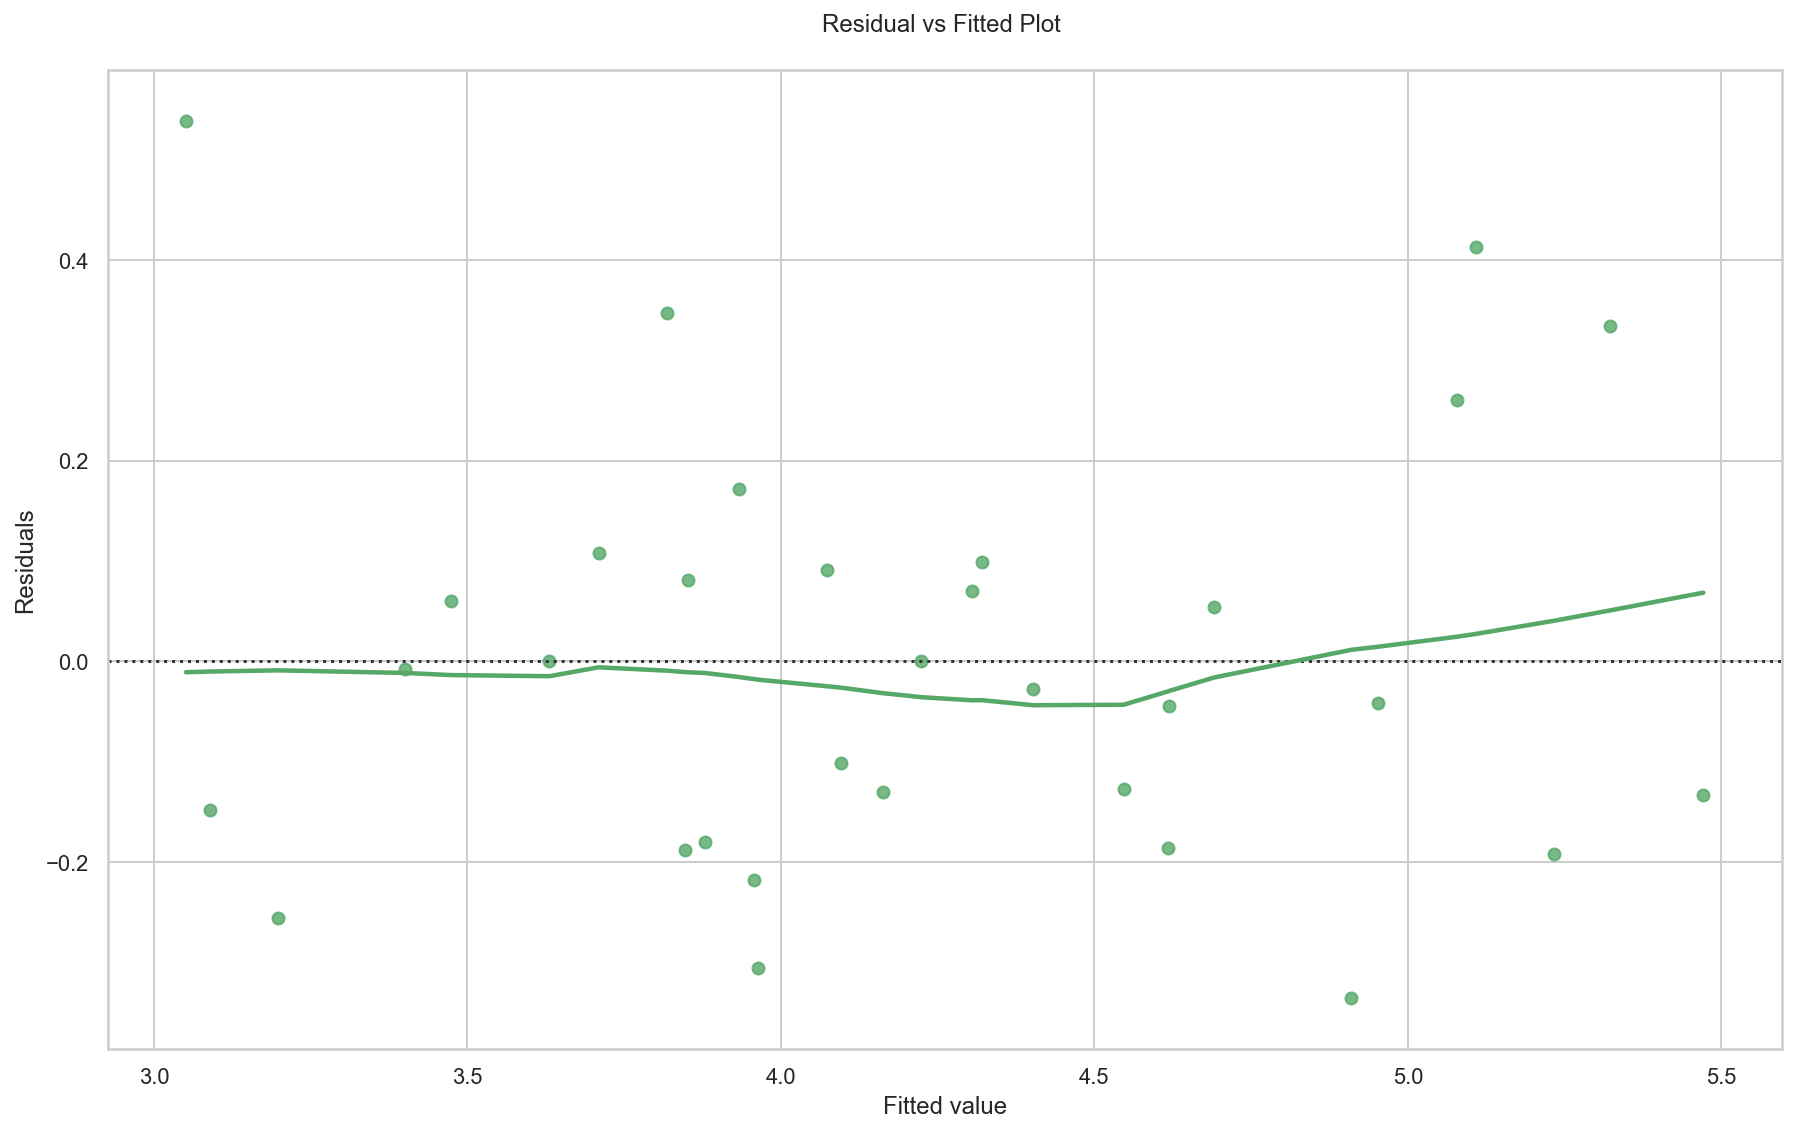

In [221]:
df3 = df2.copy()
final_df1 = df3.transform(lambda x:(x**0.5)-((x**0.5)/(1+x**1)))
final_df1.head()
yy1 =final_df1['mpg']
xx1 = final_df1.drop(columns='mpg')
#---
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant11 = sm.add_constant(xx1)
print(yy1,X_constant11)
lin_reg11 = sm.OLS(yy1,X_constant11).fit()
print(lin_reg11.summary()) 
#-----
from scipy import stats
print(stats.jarque_bera(lin_reg11.resid))
import seaborn as sns

sns.distplot(lin_reg11.resid)
plt.show()

#--
sns.set(style = 'whitegrid')
X_constant11['predictions'] = lin_reg11.predict(X_constant11)
residuals1 = lin_reg11.resid
residuals1
ax = sns.residplot(X_constant11['predictions'], residuals1, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, y_train, y_test = train_test_split(xx,yy, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score: {lin_reg.score(X_test, y_test)}')


(22, 16)
(10, 16)
(10,)
Coefficients: [-0.12434296 -0.04249732  1.43959653  0.5770027  -0.63911469  0.21316158
  0.36170626 -0.6574309  -0.49514119  0.45572072  0.09096114 -0.32369536
 -0.99399846 -1.09074239 -0.82798941 -0.83999411]
Intercept: 6.333804363052815
R^2 score: 0.9575014824893727
R^2 score: 0.5219881010100866


# Residuals

In [ ]:
X1 = X.copy()
y1 = y.copy()
X_constant = sm.add_constant(X1)# for 
model = sm.OLS(y1, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

#residual plot
sns.set(style = 'whitegrid')

df['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals
ax = sns.residplot(df.predictions, residuals, lowess = True, color = 'g')
# lo we ss is a smoothening curving.locally weighted scatter plot smoothing.
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
#plt.show()